In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruit = pd.read_csv('Fruits Dataset-Complete.csv')
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass (in g),width (cm),height (cm),color_score
0,1,banana,musa_acuminata,105.0,3.0,10.0,0.65
1,1,banana,musa_acuminata,94.5,3.0,9.0,0.71
2,1,banana,musa_acuminata,87.5,3.0,8.0,0.69
3,1,banana,musa_acuminata,96.0,3.0,8.3,0.65
4,1,banana,musa_acuminata,93.0,2.9,8.5,0.76


In [3]:
fruit.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass (in g)',
       'width (cm)', 'height (cm)', 'color_score'],
      dtype='object')

In [4]:
print(fruit.shape)

(172, 7)


In [5]:
print(fruit['fruit_name'].unique())

['banana' 'guava' 'orange' 'pomegranate']


In [6]:
print(fruit.groupby('fruit_name').size())

fruit_name
banana         44
guava          45
orange         44
pomegranate    39
dtype: int64


C:\Users\sanjj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


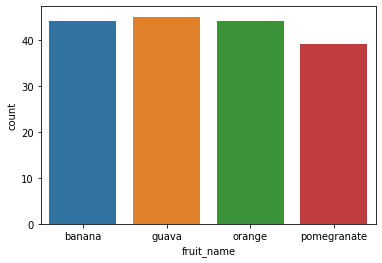

In [7]:
import seaborn as sns
sns.countplot(fruit['fruit_name'],label="Count")
plt.show()

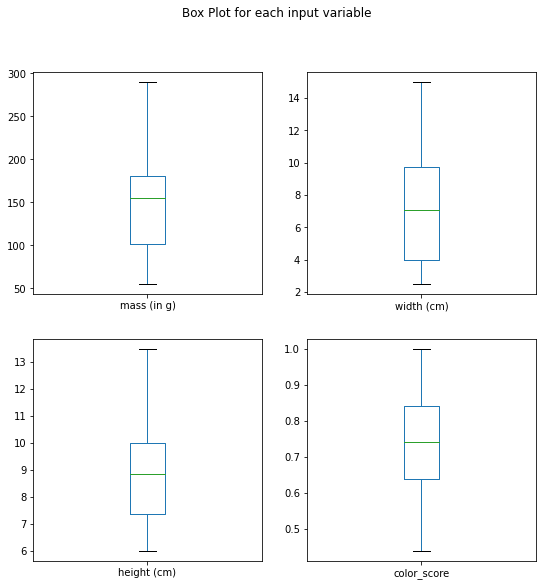

In [8]:
fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

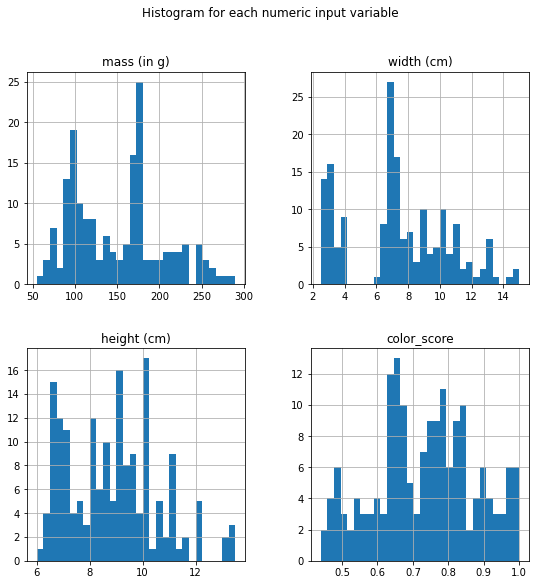

In [9]:
import pylab as pl
fruit.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

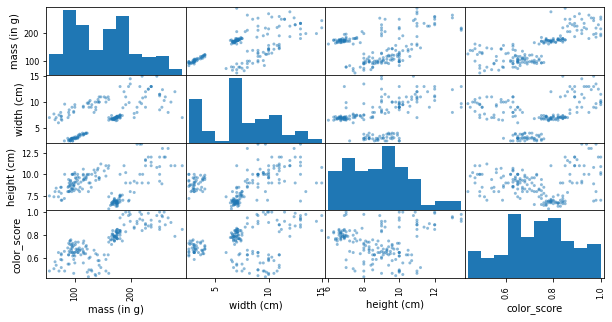

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix (fruit.drop('fruit_label', axis=1), figsize=(10,5))
plt.show()

In [11]:
feature_names = ['mass (in g)', 'width (cm)', 'height (cm)', 'color_score']
X = fruit[feature_names]
y = fruit['fruit_label']

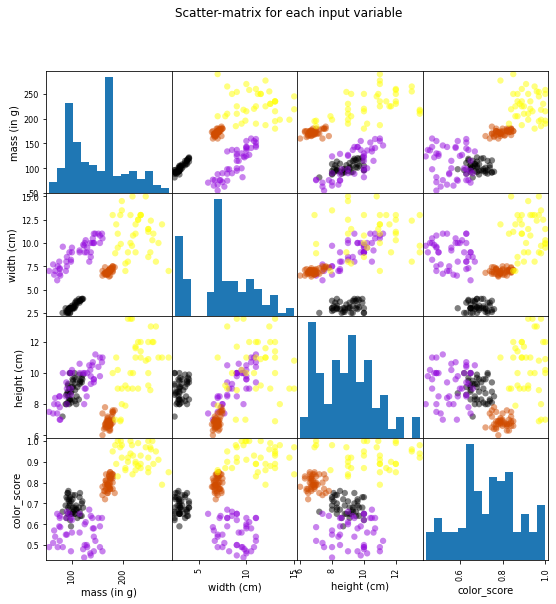

In [12]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')

In [13]:
fruit.describe()

,fruit_label,mass (in g),width (cm),height (cm),color_score
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,2.453488,150.633721,7.402326,8.834302,0.734105
std,1.104557,54.136128,3.129242,1.702024,0.141664
min,1.000000,55.000000,2.500000,6.000000,0.440000
25%,1.000000,100.875000,4.000000,7.350000,0.640000
50%,2.000000,155.000000,7.100000,8.850000,0.740000
75%,3.000000,180.000000,9.700000,10.000000,0.840000
max,4.000000,290.000000,15.000000,13.500000,1.000000


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 1.00


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.98


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 1.00


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.99
Accuracy of LDA classifier on test set: 1.00


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [20]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 1.00


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  0  0  0]
 [ 0 11  0  0]
 [ 0  0 14  0]
 [ 0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


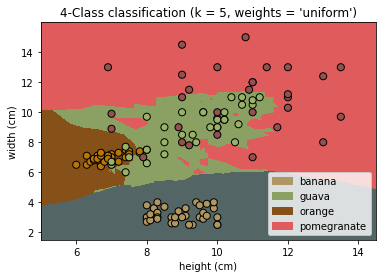

In [22]:
import seaborn as sns
from sklearn import neighbors
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruit[['mass (in g)', 'width (cm)', 'height (cm)', 'color_score']]
y = fruit['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height (cm)', 'width (cm)']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#536564', '#8BA163', '#865118','#e05c5c'])
    cmap_bold  = ListedColormap(['#B09660', '#9AB268', '#BA7705','#935151'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#B09660', label='banana')
    patch1 = mpatches.Patch(color='#8BA163', label='guava')
    patch2 = mpatches.Patch(color='#865118', label='orange')
    patch3 = mpatches.Patch(color='#e05c5c', label='pomegranate')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

([<matplotlib.axis.XTick at 0x1c300ef2700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

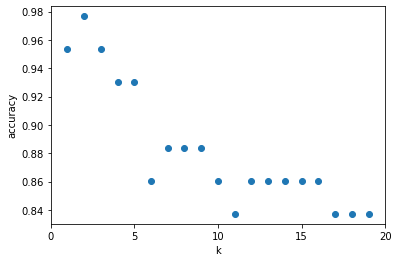

In [23]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


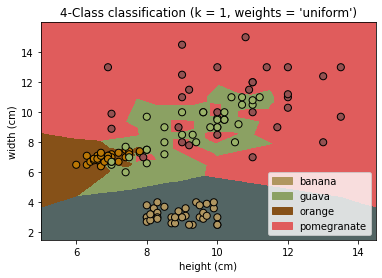

In [24]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


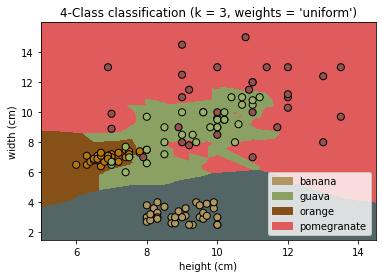

In [25]:
plot_fruit_knn(X_train, y_train, 3, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


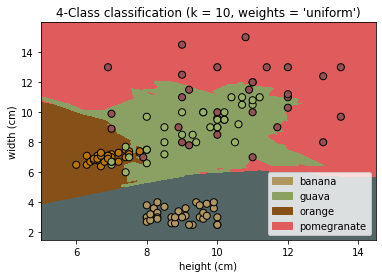

In [26]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


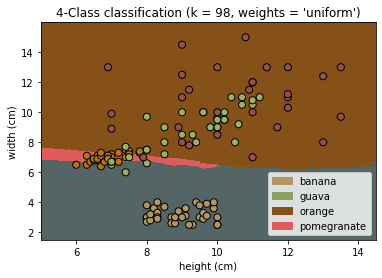

In [27]:
plot_fruit_knn(X_train, y_train, 98, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


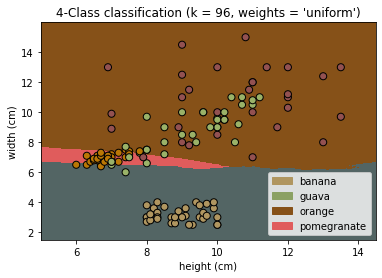

In [28]:
plot_fruit_knn(X_train, y_train, 96, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


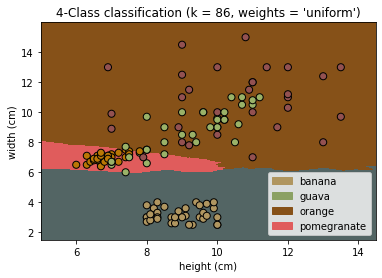

In [29]:
plot_fruit_knn(X_train, y_train, 86, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


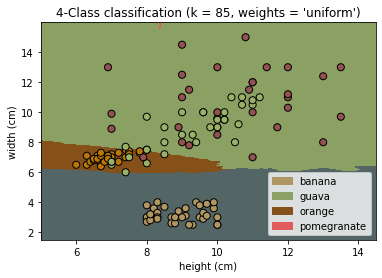

In [30]:
plot_fruit_knn(X_train, y_train, 85, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


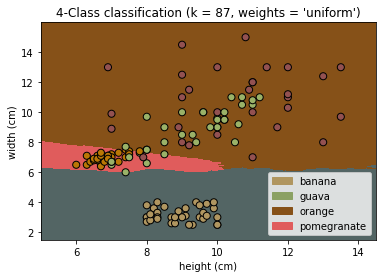

In [31]:
plot_fruit_knn(X_train, y_train, 87, 'uniform')

<ipython-input-22-7f8626855f45>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


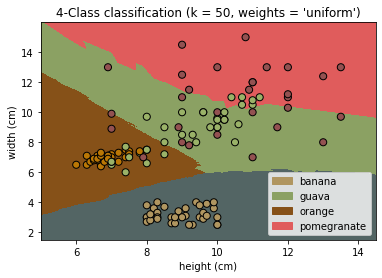

In [32]:
plot_fruit_knn(X_train, y_train, 50, 'uniform')